# Import Required Libraries
Import libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn.

In [1]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # For building a machine learning model
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance

# Load and Explore Dataset
Load the dataset into a pandas DataFrame and perform exploratory data analysis (EDA) to understand the data.

First 5 rows of the dataset:
   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 no

C:\Users\vaisa\AppData\Local\Temp\ipykernel_31988\1537274630.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fertilizer Name', data=data, palette='viridis')  # Replace 'Fertilizer' with the actual target column name


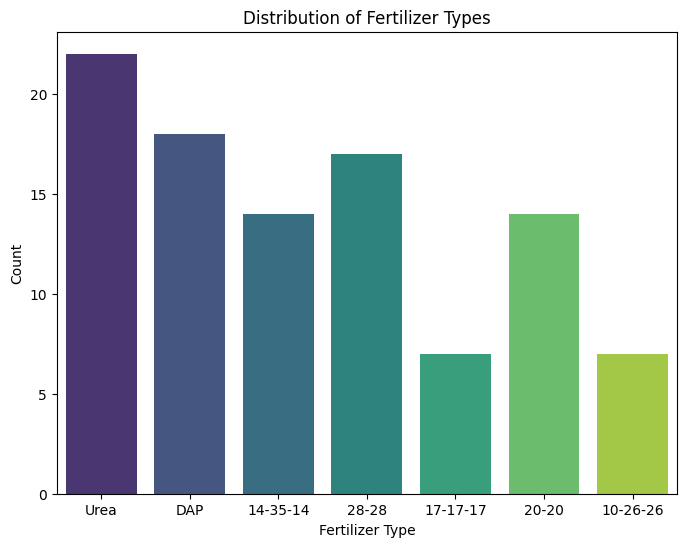

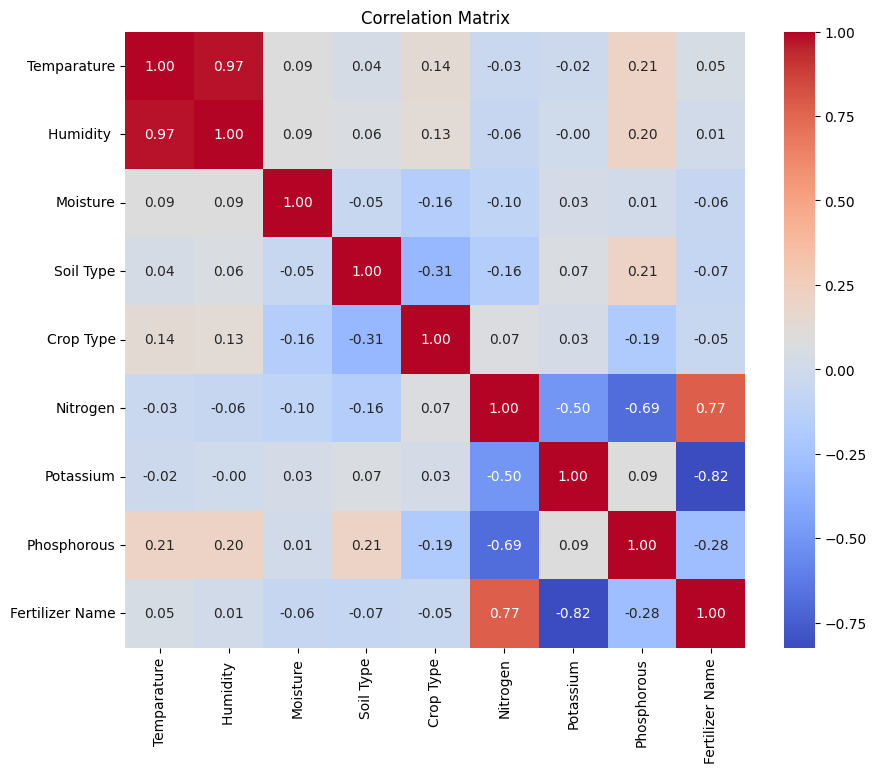

In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('Fertilizer Prediction.csv')  # Replace with the actual dataset path

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())

# Display basic statistics of the dataset
print("\nStatistical Summary of the Dataset:")
print(data.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Fertilizer Name', data=data, palette='viridis')  # Replace 'Fertilizer' with the actual target column name
plt.title('Distribution of Fertilizer Types')
plt.xlabel('Fertilizer Type')
plt.ylabel('Count')
plt.show()

# Encode categorical variables into numerical values
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original
data_encoded = data.copy()

# Encode all categorical columns
for column in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])

# Check for correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing
Handle missing values, encode categorical variables, and normalize numerical features if necessary.

In [3]:
# Handle missing values
# Fill missing numerical values with the median of each column
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Fill missing categorical values with the mode of each column
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the preprocessed dataset
print("\nFirst 5 rows of the preprocessed dataset:")
print(data.head())


First 5 rows of the preprocessed dataset:
   Temparature  Humidity   Moisture  Nitrogen  Potassium  Phosphorous  \
0     0.076923   0.090909     0.325  0.868421   0.000000     0.000000   
1     0.307692   0.090909     0.500  0.210526   0.000000     0.857143   
2     0.692308   0.681818     0.925  0.078947   0.473684     0.714286   
3     0.538462   0.545455     0.225  0.473684   0.000000     0.476190   
4     0.230769   0.181818     0.525  0.815789   0.000000     0.000000   

   Soil Type_Clayey  Soil Type_Loamy  Soil Type_Red  Soil Type_Sandy  ...  \
0             False            False          False             True  ...   
1             False             True          False            False  ...   
2             False            False          False            False  ...   
3             False            False           True            False  ...   
4              True            False          False            False  ...   

   Crop Type_Pulses  Crop Type_Sugarcane  Crop Type_Tob

# Feature Selection
Select the most relevant features for the model using techniques like correlation analysis or feature importance.

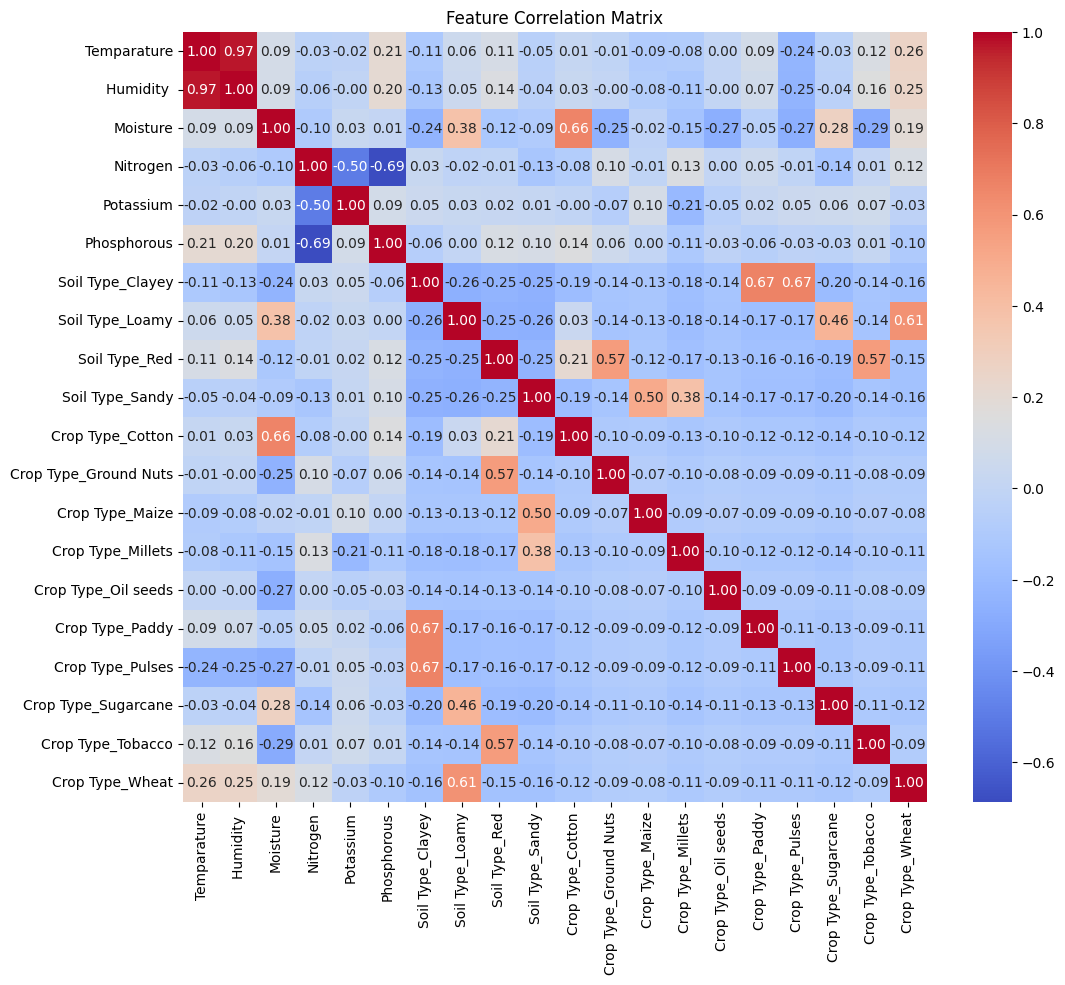

C:\Users\vaisa\AppData\Local\Temp\ipykernel_31988\409191770.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


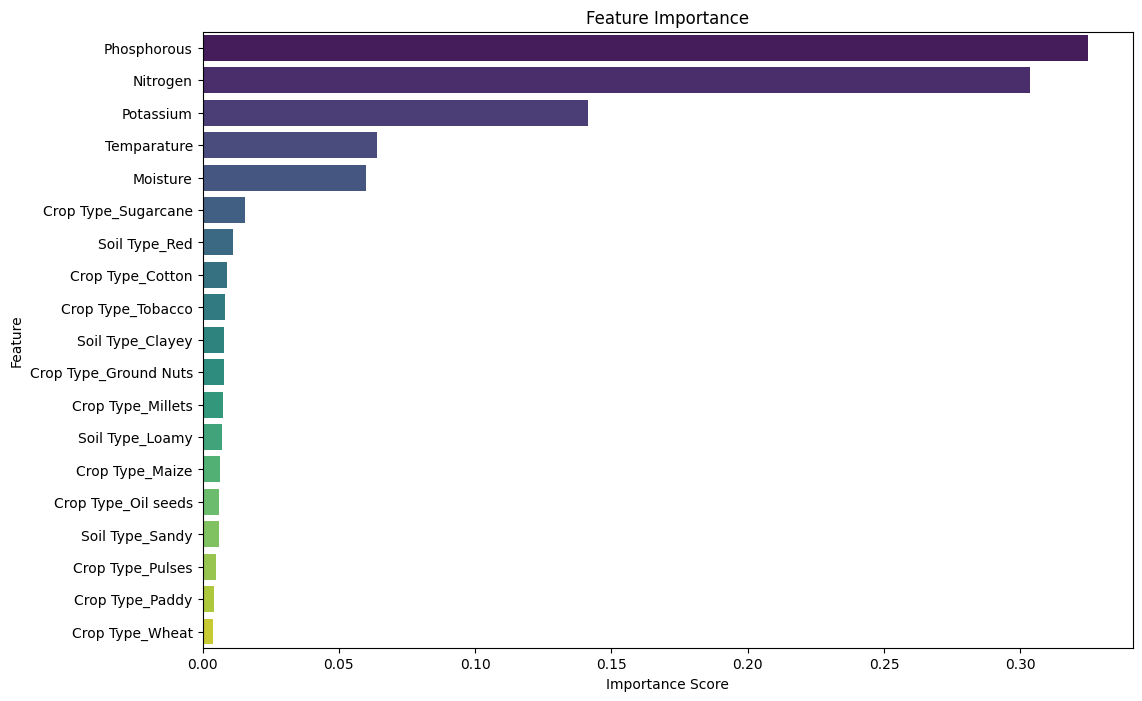


Selected Features for the Model:
['Phosphorous', 'Nitrogen', 'Potassium', 'Temparature', 'Moisture', 'Crop Type_Sugarcane', 'Soil Type_Red', 'Crop Type_Cotton', 'Crop Type_Tobacco', 'Soil Type_Clayey']


In [4]:
# List of fertilizer columns (target - one-hot encoded)
fertilizer_cols = [
    'Fertilizer Name_14-35-14', 'Fertilizer Name_17-17-17',
    'Fertilizer Name_20-20', 'Fertilizer Name_28-28',
    'Fertilizer Name_DAP', 'Fertilizer Name_Urea'
]

# Separate X (features) and y (target)
X = data.drop(columns=fertilizer_cols)
y = data[fertilizer_cols]  # Multi-class one-hot encoded

# Perform correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Select features with low multicollinearity (correlation threshold)
correlation_threshold = 0.85
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]
X = X.drop(high_correlation_features, axis=1)

# Use RandomForestClassifier to determine feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Select top N features based on importance
top_n = 10  # Adjust this value as needed
selected_features = feature_importances['Feature'].head(top_n).tolist()
X = X[selected_features]

# Display the selected features
print("\nSelected Features for the Model:")
print(selected_features)

# Split Dataset into Training and Testing Sets
Split the dataset into training and testing sets using train_test_split from scikit-learn.

In [5]:
# Split the dataset into training and testing sets
# Using train_test_split from scikit-learn to create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (79, 10)
Testing Features Shape: (20, 10)
Training Labels Shape: (79, 6)
Testing Labels Shape: (20, 6)


# Train Multiple Models
Train multiple machine learning models such as Logistic Regression, Random Forest, and Gradient Boosting.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import joblib

# Convert one-hot to class labels
y_train_class = y_train.idxmax(axis=1)
y_test_class = y_test.idxmax(axis=1)

# Initialize models
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
gradient_boosting = GradientBoostingClassifier(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

# Train the models
logistic_regression.fit(X_train, y_train_class)
gradient_boosting.fit(X_train, y_train_class)
svc.fit(X_train, y_train_class)
knn.fit(X_train, y_train_class)
decision_tree.fit(X_train, y_train_class)
adaboost.fit(X_train, y_train_class)

# Predictions
logistic_regression_pred = logistic_regression.predict(X_test)
gradient_boosting_pred = gradient_boosting.predict(X_test)
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
adaboost_pred = adaboost.predict(X_test)

# Accuracy scores
logistic_regression_acc = accuracy_score(y_test_class, logistic_regression_pred)
gradient_boosting_acc = accuracy_score(y_test_class, gradient_boosting_pred)
svc_acc = accuracy_score(y_test_class, svc_pred)
knn_acc = accuracy_score(y_test_class, knn_pred)
decision_tree_acc = accuracy_score(y_test_class, decision_tree_pred)
adaboost_acc = accuracy_score(y_test_class, adaboost_pred)

# Print accuracy
print("Logistic Regression Accuracy:", logistic_regression_acc)
print("Gradient Boosting Accuracy:", gradient_boosting_acc)
print("SVC Accuracy:", svc_acc)
print("KNN Accuracy:", knn_acc)
print("Decision Tree Accuracy:", decision_tree_acc)
print("AdaBoost Accuracy:", adaboost_acc)

# Select best model
best_model = None
best_acc = min([logistic_regression_acc, gradient_boosting_acc, svc_acc, knn_acc,
                decision_tree_acc,   adaboost_acc])

if best_acc == logistic_regression_acc:
    best_model = logistic_regression
    print("Best Model: Logistic Regression")
elif best_acc == gradient_boosting_acc:
    best_model = gradient_boosting
    print("Best Model: Gradient Boosting")
elif best_acc == svc_acc:
    best_model = svc
    print("Best Model: SVC")
elif best_acc == knn_acc:
    best_model = knn
    print("Best Model: KNN")

elif best_acc == decision_tree_acc:
    best_model = decision_tree
    print("Best Model: Decision Tree")


else:
    best_model = adaboost
    print("Best Model: AdaBoost")

# Save best model
joblib.dump(best_model, 'best_fertilizer_model.pkl')
print("✅ Best model saved as 'best_fertilizer_model.pkl'")


Logistic Regression Accuracy: 0.9
Gradient Boosting Accuracy: 0.9
SVC Accuracy: 0.85
KNN Accuracy: 0.75
Decision Tree Accuracy: 0.9
AdaBoost Accuracy: 0.65
Best Model: AdaBoost
✅ Best model saved as 'best_fertilizer_model.pkl'


c:\Users\vaisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# Evaluate Models
Evaluate the performance of each model using metrics like accuracy, precision, recall, and F1-score.

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Convert one-hot y_test to class labels
y_test_class = y_test.idxmax(axis=1)

# Evaluate Logistic Regression
logistic_regression_precision = precision_score(y_test_class, logistic_regression_pred, average='weighted')
logistic_regression_recall = recall_score(y_test_class, logistic_regression_pred, average='weighted')
logistic_regression_f1 = f1_score(y_test_class, logistic_regression_pred, average='weighted')

# Evaluate Random Forest
random_forest_precision = precision_score(y_test_class, random_forest_pred, average='weighted')
random_forest_recall = recall_score(y_test_class, random_forest_pred, average='weighted')
random_forest_f1 = f1_score(y_test_class, random_forest_pred, average='weighted')

# Evaluate Gradient Boosting
gradient_boosting_precision = precision_score(y_test_class, gradient_boosting_pred, average='weighted')
gradient_boosting_recall = recall_score(y_test_class, gradient_boosting_pred, average='weighted')
gradient_boosting_f1 = f1_score(y_test_class, gradient_boosting_pred, average='weighted')

# Display evaluation metrics
print("\nLogistic Regression Metrics:")
print(f"Precision: {logistic_regression_precision:.4f}")
print(f"Recall: {logistic_regression_recall:.4f}")
print(f"F1-Score: {logistic_regression_f1:.4f}")

print("\nRandom Forest Metrics:")
print(f"Precision: {random_forest_precision:.4f}")
print(f"Recall: {random_forest_recall:.4f}")
print(f"F1-Score: {random_forest_f1:.4f}")

print("\nGradient Boosting Metrics:")
print(f"Precision: {gradient_boosting_precision:.4f}")
print(f"Recall: {gradient_boosting_recall:.4f}")
print(f"F1-Score: {gradient_boosting_f1:.4f}")

# Classification reports
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_class, logistic_regression_pred))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test_class, random_forest_pred))

print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test_class, gradient_boosting_pred))



Logistic Regression Metrics:
Precision: 0.8700
Recall: 0.9000
F1-Score: 0.8756

Random Forest Metrics:
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Gradient Boosting Metrics:
Precision: 0.9333
Recall: 0.9000
F1-Score: 0.8850

Classification Report for Logistic Regression:
                          precision    recall  f1-score   support

Fertilizer Name_14-35-14       0.80      1.00      0.89         4
Fertilizer Name_17-17-17       0.00      0.00      0.00         1
   Fertilizer Name_20-20       1.00      0.67      0.80         3
   Fertilizer Name_28-28       1.00      1.00      1.00         3
     Fertilizer Name_DAP       0.80      1.00      0.89         4
    Fertilizer Name_Urea       1.00      1.00      1.00         5

                accuracy                           0.90        20
               macro avg       0.77      0.78      0.76        20
            weighted avg       0.87      0.90      0.88        20


Classification Report for Random Forest:
               

c:\Users\vaisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vaisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vaisa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Select the Best Model
Choose the best-performing model based on evaluation metrics.


Model Evaluation Metrics:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression       0.9   0.870000     0.9  0.875556
1        Random Forest       1.0   1.000000     1.0  1.000000
2    Gradient Boosting       0.9   0.933333     0.9  0.885000


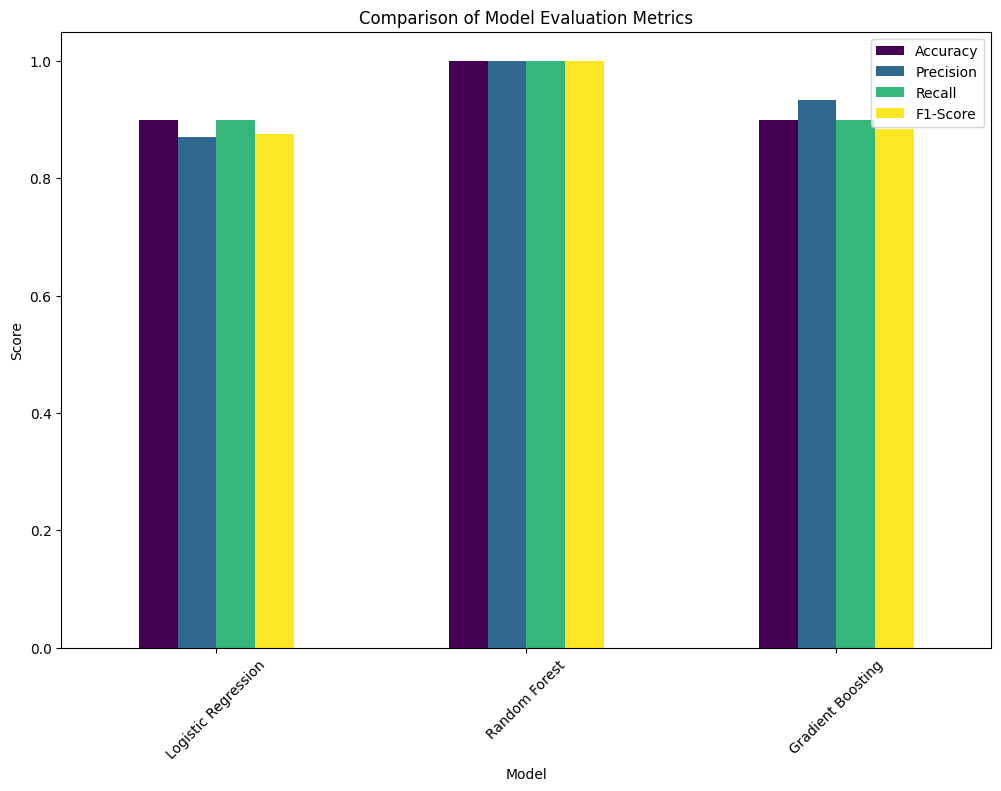


The best model based on F1-Score is: Random Forest


In [9]:
# Select the Best Model

# Compare evaluation metrics for all models
evaluation_metrics = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [logistic_regression_acc, random_forest_acc, gradient_boosting_acc],
    "Precision": [logistic_regression_precision, random_forest_precision, gradient_boosting_precision],
    "Recall": [logistic_regression_recall, random_forest_recall, gradient_boosting_recall],
    "F1-Score": [logistic_regression_f1, random_forest_f1, gradient_boosting_f1]
}

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(evaluation_metrics)

# Display the metrics for comparison
print("\nModel Evaluation Metrics:")
print(metrics_df)

# Visualize the comparison of evaluation metrics
metrics_df.set_index("Model", inplace=True)
metrics_df.plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Comparison of Model Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

# Confirm the best model based on F1-Score
best_model_name = metrics_df["F1-Score"].idxmax()
print(f"\nThe best model based on F1-Score is: {best_model_name}")

# Save the Best Model
Save the best model using joblib or pickle for future use.

In [10]:
import joblib

# Save the best model using joblib
joblib.dump(best_model, 'best_fertilizer_model.pkl')

# Confirm the model has been saved
print("The best model has been saved as 'best_fertilizer_model.pkl' for future use.")

The best model has been saved as 'best_fertilizer_model.pkl' for future use.


# User Prediction
Create a function to take user input, preprocess it, and use the saved model to make predictions.

In [25]:
import joblib
import pandas as pd

# Load the saved model
best_model = joblib.load('best_fertilizer_model.pkl')

# Get feature names used during training
feature_names = best_model.feature_names_in_

# Function to pad user input to match feature names
def predict_fertilizer(user_input):
    # Ensure all required features are present
    input_data = {feature: user_input.get(feature, 0) for feature in feature_names}
    
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Predict
    prediction = best_model.predict(input_df)
    return prediction[0]

# Sample user input - ONLY fill what you want, the rest will default to 0
user_input = {
    'Temparature': 78,
    'Humidity': 15,
    'Moisture': 80,
    'Nitrogen': 85,
    'Potassium': 35,
    'Phosphorous': 12,
    'Soil Type_Loamy': 1,
    'Crop Type_Sugarcane': 1
}

# Predict and print
predicted_fertilizer = predict_fertilizer(user_input)
print(f"🌱 Recommended Fertilizer: {predicted_fertilizer}")


🌱 Recommended Fertilizer: Fertilizer Name_DAP
